

        #What is the percentage of wins of each team?
        #Which venue results in a win for Batting first team and vice versa?
        Who is the most consistent batsman and bowler in each team and also in the entire league?
        #Who wins the most player of the matches in the tournament?
        Predict the winning team with the consistency of wins and ball deliveries?
        #Who is the most valuable player after every match day?



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("IPL_Matches_2022.csv")

In [3]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,NaN,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,NaN,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,NaN,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,NaN,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


In [4]:
df.isnull().sum()

ID                  0
City                0
Date                0
Season              0
MatchNumber         0
Team1               0
Team2               0
Venue               0
TossWinner          0
TossDecision        0
SuperOver           0
WinningTeam         0
WonBy               0
Margin              0
method             74
Player_of_Match     0
Team1Players        0
Team2Players        0
Umpire1             0
Umpire2             0
dtype: int64

In [5]:
df.drop('method', axis=1,inplace=True)


In [6]:
df

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,1304051,Pune,2022-03-29,2022,5,Rajasthan Royals,Sunrisers Hyderabad,"Maharashtra Cricket Association Stadium, Pune",Sunrisers Hyderabad,field,N,Rajasthan Royals,Runs,61,SV Samson,"['JC Buttler', 'YBK Jaiswal', 'SV Samson', 'D ...","['KS Williamson', 'Abhishek Sharma', 'RA Tripa...",BNJ Oxenford,UV Gandhe
70,1304050,Mumbai,2022-03-28,2022,4,Lucknow Super Giants,Gujarat Titans,"Wankhede Stadium, Mumbai",Gujarat Titans,field,N,Gujarat Titans,Wickets,5,Mohammed Shami,"['KL Rahul', 'Q de Kock', 'E Lewis', 'MK Pande...","['Shubman Gill', 'MS Wade', 'V Shankar', 'HH P...",PG Pathak,VK Sharma
71,1304049,Mumbai,2022-03-27,2022,3,Royal Challengers Bangalore,Punjab Kings,"Dr DY Patil Sports Academy, Mumbai",Punjab Kings,field,N,Punjab Kings,Wickets,5,OF Smith,"['F du Plessis', 'Anuj Rawat', 'V Kohli', 'KD ...","['MA Agarwal', 'S Dhawan', 'PBB Rajapaksa', 'L...",Nitin Menon,YC Barde
72,1304048,Mumbai,2022-03-27,2022,2,Mumbai Indians,Delhi Capitals,"Brabourne Stadium, Mumbai",Delhi Capitals,field,N,Delhi Capitals,Wickets,4,Kuldeep Yadav,"['RG Sharma', 'Ishan Kishan', 'Anmolpreet Sing...","['PP Shaw', 'TL Seifert', 'Mandeep Singh', 'RR...",RJ Tucker,HAS Khalid


In [7]:
df.drop("SuperOver",axis=1,inplace=True)

In [8]:
df.drop("ID",axis=1,inplace=True)

In [9]:
df.head()

,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,WinningTeam,WonBy,Margin,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,Gujarat Titans,Wickets,7,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,Rajasthan Royals,Wickets,7,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,Royal Challengers Bangalore,Runs,14,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,Gujarat Titans,Wickets,7,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,Punjab Kings,Wickets,5,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [10]:
df_counts = df[['Venue', 'TossDecision', 'WonBy', 'Margin']].value_counts().reset_index(name='count')


In [11]:
df_counts

,Venue,TossDecision,WonBy,Margin,count
0,"Wankhede Stadium, Mumbai",field,Wickets,5,4
1,"Dr DY Patil Sports Academy, Mumbai",field,Wickets,8,3
2,"Brabourne Stadium, Mumbai",field,Wickets,6,2
3,"Wankhede Stadium, Mumbai",field,Wickets,6,2
4,"Wankhede Stadium, Mumbai",field,Wickets,4,2
5,"Dr DY Patil Sports Academy, Mumbai",field,Runs,23,2
6,"Dr DY Patil Sports Academy, Mumbai",field,Wickets,3,2
7,"Dr DY Patil Sports Academy, Mumbai",field,Wickets,5,2
8,"Brabourne Stadium, Mumbai",field,Runs,54,2
9,"Maharashtra Cricket Association Stadium, Pune",field,Runs,13,2


In [12]:
player_counts = df['Player_of_Match'].value_counts()

In [13]:
player_counts

Kuldeep Yadav       4
JC Buttler          3
HH Pandya           2
KL Rahul            2
YS Chahal           2
KD Karthik          2
Avesh Khan          2
PWH de Silva        2
Shubman Gill        2
Umran Malik         2
JJ Bumrah           2
DA Miller           2
RA Tripathi         2
Q de Kock           2
UT Yadav            2
F du Plessis        1
R Parag             1
S Dhawan            1
Mohammed Shami      1
M Jansen            1
Rashid Khan         1
Mukesh Choudhary    1
LH Ferguson         1
SV Samson           1
LS Livingstone      1
E Lewis             1
MA Agarwal          1
KS Williamson       1
Anuj Rawat          1
Abhishek Sharma     1
PJ Cummins          1
S Dube              1
Mohsin Khan         1
KH Pandya           1
DR Sams             1
RM Patidar          1
Harpreet Brar       1
R Ashwin            1
V Kohli             1
SN Thakur           1
TA Boult            1
WP Saha             1
AD Russell          1
JM Bairstow         1
MR Marsh            1
R Tewatia 

In [14]:
most_pom = df.groupby(['WinningTeam', 'Player_of_Match']).size().reset_index(name='count')
most_pom = most_pom.sort_values(['WinningTeam', 'count'], ascending=[True, False])
most_pom = most_pom.groupby('WinningTeam').head(1)
#most player of the match by player from each team

In [15]:
most_pom

,WinningTeam,Player_of_Match,count
0,Chennai Super Kings,DP Conway,1
5,Delhi Capitals,Kuldeep Yadav,4
8,Gujarat Titans,DA Miller,2
21,Kolkata Knight Riders,UT Yadav,2
22,Lucknow Super Giants,Avesh Khan,2
28,Mumbai Indians,DR Sams,1
32,Punjab Kings,Harpreet Brar,1
39,Rajasthan Royals,JC Buttler,3
49,Royal Challengers Bangalore,KD Karthik,2
56,Sunrisers Hyderabad,RA Tripathi,2


In [16]:
wickets_df = df[df['WonBy'] == 'Wickets']
runs_df = df[df['WonBy'] == 'Runs']

# Calculate the number of wins for each team for wickets and runs separately
wickets_wins = wickets_df['WinningTeam'].value_counts()
runs_wins = runs_df['WinningTeam'].value_counts()

# Merge the two counts into a single DataFrame
team_wins = pd.concat([wickets_wins, runs_wins], axis=1)
team_wins.columns = ['Wickets', 'Runs']
team_wins.fillna(0, inplace=True)

# Calculate the total number of wins for each team
team_wins['Total Wins'] = team_wins['Wickets'] + team_wins['Runs']

print(team_wins)

                             Wickets  Runs  Total Wins
Gujarat Titans                     8     4          12
Sunrisers Hyderabad                5     1           6
Royal Challengers Bangalore        4     5           9
Delhi Capitals                     4     3           7
Kolkata Knight Riders              4     2           6
Rajasthan Royals                   3     7          10
Punjab Kings                       3     4           7
Mumbai Indians                     3     1           4
Lucknow Super Giants               2     7           9
Chennai Super Kings                1     3           4


In [17]:
# Calculate the total number of matches played by each team
total_matches = df['Team1'].value_counts() + df['Team2'].value_counts()
total_matches = total_matches.sort_index()

# Calculate the winning percentage of each team
team_wins_percentage = (team_wins['Total Wins'] / total_matches) * 100
team_wins_percentage = team_wins_percentage.round(2)

# Create a DataFrame to display the results
winning_percentage_df = pd.DataFrame({'Total Matches': total_matches, 'Total Wins': team_wins['Total Wins'], 'Winning Percentage (%)': team_wins_percentage})
winning_percentage_df.index.name = 'Team'

print(winning_percentage_df)


                             Total Matches  Total Wins  Winning Percentage (%)
Team                                                                          
Chennai Super Kings                     14           4                   28.57
Delhi Capitals                          14           7                   50.00
Gujarat Titans                          16          12                   75.00
Kolkata Knight Riders                   14           6                   42.86
Lucknow Super Giants                    15           9                   60.00
Mumbai Indians                          14           4                   28.57
Punjab Kings                            14           7                   50.00
Rajasthan Royals                        17          10                   58.82
Royal Challengers Bangalore             16           9                   56.25
Sunrisers Hyderabad                     14           6                   42.86


In [18]:
df1=pd.read_csv("IPL_Ball_by_Ball_2022.csv")

In [19]:
df1

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17907,1304047,2,17,5,SS Iyer,DJ Bravo,SP Jackson,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17908,1304047,2,17,6,SP Jackson,DJ Bravo,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17909,1304047,2,18,1,SP Jackson,AF Milne,SS Iyer,NaN,1,0,1,0,0,NaN,NaN,NaN,Kolkata Knight Riders
17910,1304047,2,18,2,SS Iyer,AF Milne,SP Jackson,NaN,2,0,2,0,0,NaN,NaN,NaN,Kolkata Knight Riders


In [20]:
df.isnull().sum()

City               0
Date               0
Season             0
MatchNumber        0
Team1              0
Team2              0
Venue              0
TossWinner         0
TossDecision       0
WinningTeam        0
WonBy              0
Margin             0
Player_of_Match    0
Team1Players       0
Team2Players       0
Umpire1            0
Umpire2            0
dtype: int64

In [21]:
df1.drop('player_out', axis=1, inplace=True)


In [22]:
df1.drop("kind", axis=1,inplace=True)

In [23]:
df1.drop("fielders_involved", axis=1,inplace=True)

In [24]:
df1.drop("extra_type", axis=1,inplace=True)

In [25]:
df1.drop("ID", axis=1,inplace=True)

In [26]:
df1.head(121)

,innings,overs,ballnumber,batter,bowler,non-striker,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,BattingTeam
0,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
1,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,0,1,1,0,0,Rajasthan Royals
2,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,1,0,1,0,0,Rajasthan Royals
3,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
4,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,0,0,0,0,0,Rajasthan Royals
...,...,...,...,...,...,...,...,...,...,...,...,...
116,1,19,3,R Parag,Mohammed Shami,OC McCoy,4,0,4,0,0,Rajasthan Royals
117,1,19,4,R Parag,Mohammed Shami,OC McCoy,1,0,1,0,1,Rajasthan Royals
118,1,19,5,R Parag,Mohammed Shami,M Prasidh Krishna,0,0,0,0,0,Rajasthan Royals
119,1,19,6,R Parag,Mohammed Shami,M Prasidh Krishna,0,0,0,0,1,Rajasthan Royals


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

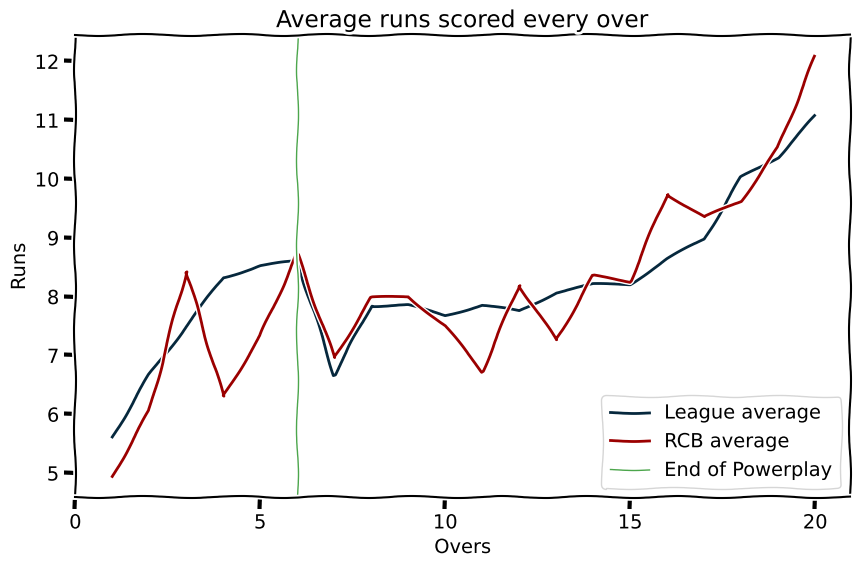

In [27]:
over_stats = df1[['overs','total_run']].groupby('overs').mean()*6
over_stats.rename(columns={'total_run':'league_average'})
over_stats['RCB_stats'] = df1.loc[df1['BattingTeam']=='Royal Challengers Bangalore',['overs','total_run']].groupby('overs').mean()*6

over_stats.index=np.arange(1,21)

plt.xkcd()
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.title('Average runs scored every over')
plt.plot(over_stats['total_run'].index, over_stats['total_run'].values,label='League average',color='#06283D')
plt.plot(over_stats['RCB_stats'], label='RCB average',color='#9B0000')
plt.axvline(x=6, color='green', alpha=0.7, linewidth=1, label='End of Powerplay')


plt.xticks(np.arange(0,21,5))
plt.ylabel('Runs')
plt.xlabel('Overs')
plt.legend()

plt.grid()

# plt.savefig('Run rate change',bbox_inches='tight')
plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

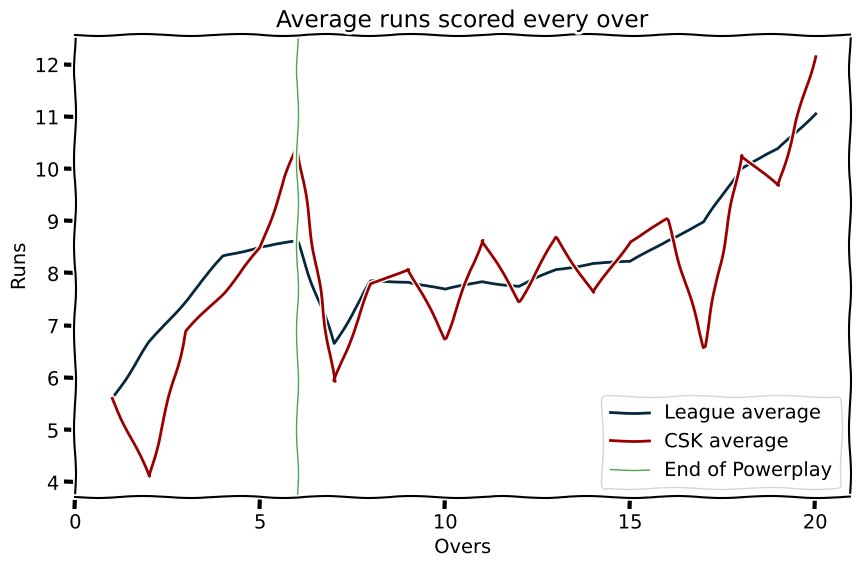

In [28]:
over_stats = df1[['overs','total_run']].groupby('overs').mean()*6
over_stats.rename(columns={'total_run':'league_average'})
over_stats['csk_stats'] = df1.loc[df1['BattingTeam']=='Chennai Super Kings',['overs','total_run']].groupby('overs').mean()*6

over_stats.index=np.arange(1,21)

plt.xkcd()
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.title('Average runs scored every over')
plt.plot(over_stats['total_run'].index, over_stats['total_run'].values,label='League average',color='#06283D')
plt.plot(over_stats['csk_stats'], label='CSK average',color='#9B0000')
plt.axvline(x=6, color='green', alpha=0.7, linewidth=1, label='End of Powerplay')


plt.xticks(np.arange(0,21,5))
plt.ylabel('Runs')
plt.xlabel('Overs')
plt.legend()

plt.grid()

# plt.savefig('Run rate change',bbox_inches='tight')
plt.show()


findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Humor Sans' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'Comic Sans MS' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
f

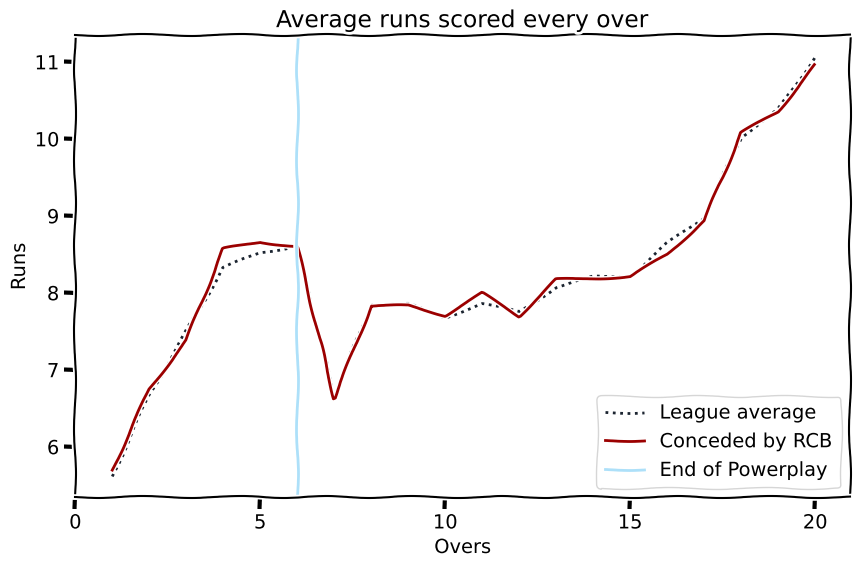

In [29]:
#rcb_match_ids = rcb_results['ID']

over_stats = df1[['overs','total_run']].groupby('overs').mean()*6
over_stats.rename(columns={'total_run':'league_average'})
over_stats['RCB_score'] = df1.loc[df1['BattingTeam']=='Royal Challengers Bangalore',['overs','total_run']].groupby('overs').mean()*6
over_stats['RCB_concede'] =  df1.loc[(df1['BattingTeam']!='Royal Challengers Bangalore')][['overs','total_run']].groupby('overs').mean()*6
over_stats.index=np.arange(1,21)
plt.xkcd()
plt.figure(figsize=(10,6))
# plt.style.use('seaborn')
plt.title('Average runs scored every over')
plt.plot(over_stats['total_run'].index, over_stats['total_run'].values,label='League average',color='#1B2430', linestyle=':')
# plt.plot(over_stats['RCB_score'], label='RCB scoring average',color='#3EC70B')
plt.plot(over_stats['RCB_concede'], label='Conceded by RCB', color='#9B0000')
plt.axvline(x=6, color='#34B3F1', alpha=0.4, linewidth=2, label='End of Powerplay', linestyle='-')


plt.xticks(np.arange(0,21,5))
plt.ylabel('Runs')
plt.xlabel('Overs')
plt.legend()

plt.grid()

plt.savefig('rpo rcb conceded vs scored',bbox_inches='tight')
plt.show()
